# Urmi Patel 
 (CP8305)

# How to add CSV file into Google Colab file !


---
You need to download csv files from Kaggle website [GooglePlayStore_Dataset](https://www.kaggle.com/lava18/google-play-store-apps)

* first, run the below code
* you will get 'choose files' option and click on it and select the file that you downloaded.
* name -> googleplaystore.csv
* after importing the csv file , you can run next code.







In [1]:
# Add CSV file to the notebook
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file name:"{name}" with length: {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving googleplaystore.csv to googleplaystore.csv
User uploaded file name:"googleplaystore.csv" with length: 1360155 bytes


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('/content/googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Describe the rating column
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# Show number of null values of our dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Data Preprocessing 

## Data cleaning

In [9]:
df.dropna(inplace = True)

In [10]:
# After removing missing value we have 9360 instances in total
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
# Cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

In [13]:
# Filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [14]:
# Cleaning no of installs 
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [15]:
# Cleaning of content rating 
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [16]:
# Cleaning prices column
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

## Data Transformation 

In [17]:
# Cleaning Categories column into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)
#print(category_dict)

In [18]:
# Converting Type column into binary
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [19]:
# Cleaning of genres column
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [20]:
# Convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [21]:
# Dropping of unrelated and unnecessary items from the dataset
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int64  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int64  
 10  Genres_c        9360 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 877.5+ KB


In [23]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2


In [24]:
# Second dataframe for one-hot encoding
df2 = pd.get_dummies(df, columns=['Category'])

In [25]:
df2.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_c,Genres_c,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Visualisation 

## Rating Distribution 

Text(0.5, 1.0, 'Distribution of Rating')

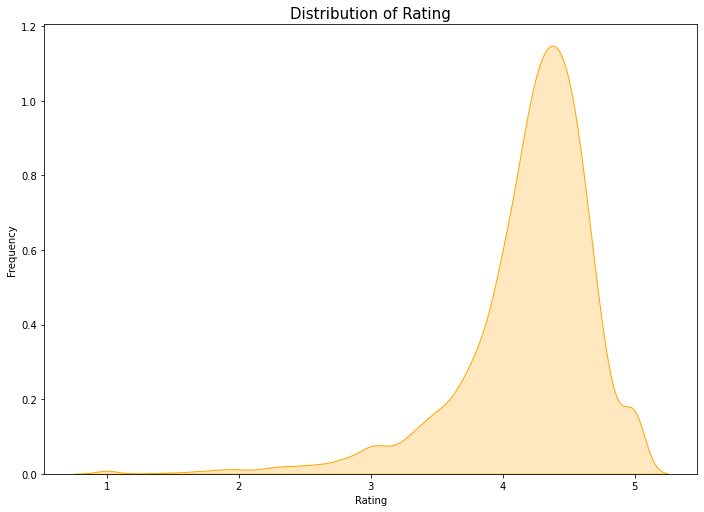

In [26]:
# distribution of ratings
from pylab import rcParams

rcParams['figure.figsize'] = 11.7, 8.27
g = sns.kdeplot(df.Rating, color="orange", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 15)

In [27]:
print('Average app rating = ', np.mean(df['Rating']))

Average app rating =  4.191837606837612


## Correlation Matrix of data

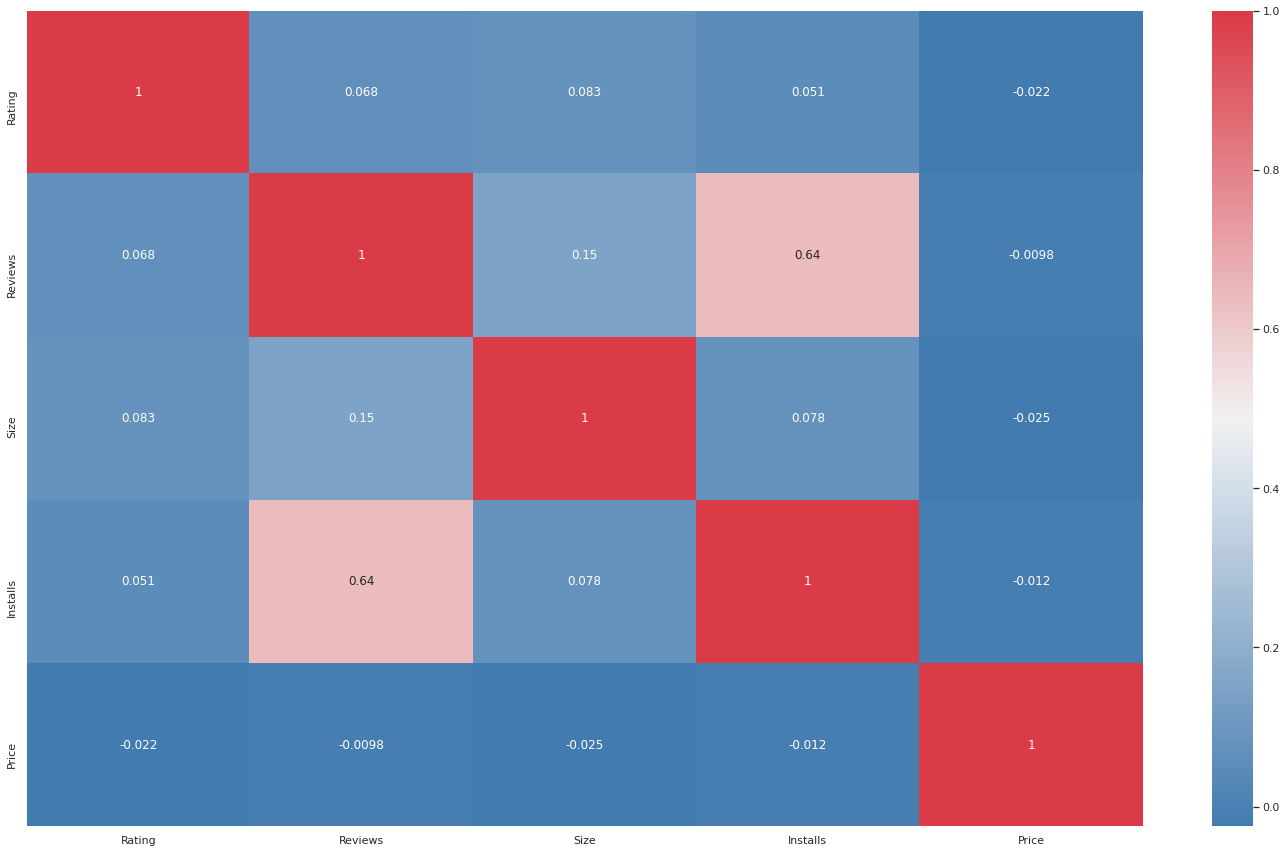

In [28]:
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

df_corr = df.copy()
df_corr.drop(labels = ['Type','Category_c','Content Rating','Genres_c'], axis = 1, inplace = True)

corrmat = df_corr.corr()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(245,10, as_cmap=True))

## Size VS Rating

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


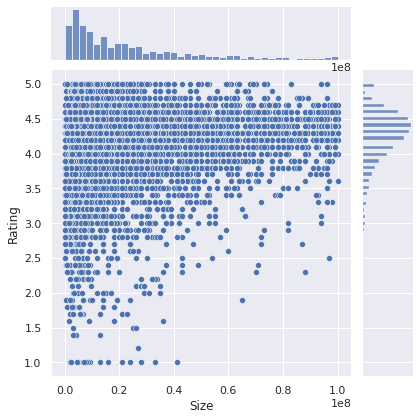

In [29]:
# How the application size impact on the rating
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])

# Error Term

In [30]:
#for evaluation of error term and 
def Evaluationmatrix(y_true, y_predict):
    print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_true,y_predict)))
    print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_true,y_predict)))
    print ('r2_score: '+ str(metrics.r2_score(y_true,y_predict)))

In [31]:
#to add into results_index for evaluation of error term 
def Evaluationmatrix_dict(y_true, y_predict, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    dict_matrix['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    dict_matrix['r2_score'] = metrics.r2_score(y_true,y_predict)
    
    return dict_matrix

# Regression models

## Linear Regression 

### Without Genres

In [32]:
# Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)
Results = model.predict(X_test)

lr_mse = metrics.mean_squared_error(y_test, Results)
lr_r2 = metrics.r2_score(y_test, Results)
lr_mae = metrics.median_absolute_error(y_test, Results)

# Creation of results dataframe and addition of first entry
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(y_test,Results),orient = 'index')
resultsdf = resultsdf.transpose()

In [34]:

print("For Integer encoding")
print ('Mean squared error: ' +str(lr_mse))
print ('Mean absolute error: ' +str(lr_mae))
print ('r2 score: ' +str(lr_r2))

For Integer encoding
Mean squared error: 0.2520023919567276
Mean absolute error: 0.25608247723818556
r2 score: 0.013226823000762944


In [35]:
# One-hot encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

In [36]:

model_d = LinearRegression()
model_d.fit(X_train_d,y_train_d)
Results_d = model_d.predict(X_test_d)

lr_mse_d = metrics.mean_squared_error(y_test_d, Results_d)
lr_r2_d = metrics.r2_score(y_test_d, Results_d)
lr_mae_d = metrics.median_absolute_error(y_test_d, Results_d)

# Adding results into results dataframe
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results_d, name = 'Linear - OneHot'),ignore_index = True)

In [37]:
print("For one-hot encoding")
print ('Mean squared error: ' +str(lr_mse_d))
print ('Mean absolute error: ' +str(lr_mae_d))
print ('r2 score: ' +str(lr_r2_d))


For one-hot encoding
Mean squared error: 0.2683475613698153
Mean absolute error: 0.2588567760723608
r2 score: 0.03146184119544293


### With Genres

In [38]:
# Including genre label

# Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [39]:

modela = LinearRegression()
modela.fit(X_train,y_train)
Resultsa = modela.predict(X_test)

lrg_mse = metrics.mean_squared_error(y_test, Resultsa)
lrg_r2 = metrics.r2_score(y_test, Resultsa)
lrg_mae = metrics.median_absolute_error(y_test, Resultsa)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Resultsa, name = 'Linear(inc Genre) - Integer'),ignore_index = True)



In [40]:
print("For Integer encoding including genre")
print ('Mean squared error: ' +str(lrg_mse))
print ('Mean absolute error: ' +str(lrg_mae))
print ('r2 score: ' +str(lrg_r2))

For Integer encoding including genre
Mean squared error: 0.26439120465836724
Mean absolute error: 0.272381884645696
r2 score: 0.007321711580269397


In [41]:
# One-hot encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

In [42]:

modela_d = LinearRegression()
modela_d.fit(X_train_d,y_train_d)
Resultsa_d = modela_d.predict(X_test_d)

lrg_mse_d = metrics.mean_squared_error(y_test_d, Resultsa_d)
lrg_r2_d = metrics.r2_score(y_test_d, Resultsa_d)
lrg_mae_d = metrics.median_absolute_error(y_test_d, Resultsa_d)

resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Resultsa_d, name = 'Linear(inc Genre) - OneHot'),ignore_index = True)

In [43]:
print("For one-hot encoding including genres")
print ('Mean squared error: ' +str(lrg_mse_d))
print ('Mean absolute error: ' +str(lrg_mae_d))
print ('r2 score: ' +str(lrg_r2_d))

For one-hot encoding including genres
Mean squared error: 0.2741509739353218
Mean absolute error: 0.25922382386871945
r2 score: 0.030919491174046687


## Random Forest

### Without Genres

In [44]:
# Integer encoding
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [45]:

model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
Results2 = model2.predict(X_test)

rf_mse = metrics.mean_squared_error(y_test, Results2)
rf_r2 = metrics.r2_score(y_test, Results2)
rf_mae = metrics.median_absolute_error(y_test, Results2)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2, name = 'RFR - Integer'),ignore_index = True)


In [46]:
print("For Integer encoding")
print ('Mean squared error: ' +str(rf_mse))
print ('Mean absolute error: ' +str(rf_mae))
print ('r2 score: ' +str(rf_r2))

For Integer encoding
Mean squared error: 0.22361853223557693
Mean absolute error: 0.2030000000000003
r2 score: 0.13462382108701587


In [47]:
# One-hot encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30, random_state=10)

In [48]:

model2_d = RandomForestRegressor()
model2_d.fit(X_train_d,y_train_d)
Results2_d = model2_d.predict(X_test_d)

rf_mse_d = metrics.mean_squared_error(y_test_d, Results2_d)
rf_r2_d = metrics.r2_score(y_test_d, Results2_d)
rf_mae_d = metrics.median_absolute_error(y_test_d, Results2_d)


#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2_d, name = 'RFR - OneHot'),ignore_index = True)

In [49]:
print("For one-hot encoding")
print ('Mean squared error: ' +str(rf_mse_d))
print ('Mean absolute error: ' +str(rf_mae_d))
print ('r2 score: ' +str(rf_r2_d))


For one-hot encoding
Mean squared error: 0.22713084438859887
Mean absolute error: 0.1994999999999978
r2 score: 0.12103160563087567


### With Genres

In [50]:
# Including Genres

# Integer encoding
X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=10)

In [51]:

model2a = RandomForestRegressor()
model2a.fit(X_train,y_train)
Results2a = model2a.predict(X_test)

rfg_mse = metrics.mean_squared_error(y_test, Results2a)
rfg_r2 = metrics.r2_score(y_test, Results2a)
rfg_mae = metrics.median_absolute_error(y_test, Results2a)


# Evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2a, name = 'RFR(inc Genres) - Integer'),ignore_index = True)



In [52]:
print("For Integer encoding including genre")
print ('Mean squared error: ' +str(rfg_mse))
print ('Mean absolute error: ' +str(rfg_mae))
print ('r2 score: ' +str(rfg_r2))

For Integer encoding including genre
Mean squared error: 0.22263563654981156
Mean absolute error: 0.2049999999999994
r2 score: 0.13842750633758183


In [53]:
# One-hot encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30,random_state=10)

In [54]:

model2a_d = RandomForestRegressor()
model2a_d.fit(X_train_d,y_train_d)
Results2a_d = model2a_d.predict(X_test_d)

rfg_mse_d = metrics.mean_squared_error(y_test_d, Results2a_d)
rfg_r2_d = metrics.r2_score(y_test_d, Results2a_d)
rfg_mae_d = metrics.median_absolute_error(y_test_d, Results2a_d)

# Evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results2a_d, name = 'RFR(inc Genres) - OneHot'),ignore_index = True)

In [55]:
print("For one-hot encoding including genres")
print ('Mean squared error: ' +str(rfg_mse_d))
print ('Mean absolute error: ' +str(rfg_mae_d))
print ('r2 score: ' +str(rfg_r2_d))

For one-hot encoding including genres
Mean squared error: 0.22071772471984807
Mean absolute error: 0.20099999999999785
r2 score: 0.1458495889096888


## SVR

### Without Genres

In [56]:
#Integer encoding

X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [57]:


model3 = svm.SVR()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

svr_mse = metrics.mean_squared_error(y_test, Results3)
svr_r2 = metrics.r2_score(y_test, Results3)
svr_mae = metrics.median_absolute_error(y_test, Results3)

# Evaluation 
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3, name = 'SVR - Integer'),ignore_index = True)



In [58]:
print("For Integer encoding")
print ('Mean squared error: ' +str(svr_mse))
print ('Mean absolute error: ' +str(svr_mae))
print ('r2 score: ' +str(svr_r2))

For Integer encoding
Mean squared error: 0.27047818904576515
Mean absolute error: 0.24477422326208487
r2 score: 0.007350740607242279


In [59]:
# One-hot encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

In [60]:


model3 = svm.SVR()
model3.fit(X_train_d,y_train_d)
Results3_d = model3.predict(X_test_d)

svr_mse_d = metrics.mean_squared_error(y_test_d, Results3_d)
svr_r2_d = metrics.r2_score(y_test_d, Results3_d)
svr_mae_d = metrics.median_absolute_error(y_test_d, Results3_d)

# Evaluation 
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results3_d, name = 'SVR - OneHot'),ignore_index = True)

In [61]:
print("For one-hot encoding")
print ('Mean squared error: ' +str(svr_mse_d))
print ('Mean absolute error: ' +str(svr_mae_d))
print ('r2 score: ' +str(svr_r2_d))

For one-hot encoding
Mean squared error: 0.23530105357229703
Mean absolute error: 0.24777316751651046
r2 score: 0.01856761604823609


### With Genres

In [62]:
# Integer encoding, including Genres

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [63]:

model3a = svm.SVR()
model3a.fit(X_train,y_train)
Results3a = model3a.predict(X_test)

svr_mse = metrics.mean_squared_error(y_test, Results3a)
svr_r2 = metrics.r2_score(y_test, Results3a)
svr_mae = metrics.median_absolute_error(y_test, Results3a)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test,Results3a, name = 'SVR(inc Genres) - Integer'),ignore_index = True)



In [64]:
print("For Integer encoding including genre")
print ('Mean squared error: ' +str(svr_mse))
print ('Mean absolute error: ' +str(svr_mae))
print ('r2 score: ' +str(svr_r2))

For Integer encoding including genre
Mean squared error: 0.2411660386258848
Mean absolute error: 0.21965410424382492
r2 score: 0.017964946181750707


In [65]:
# One-hot encoding, including Genres

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

In [66]:

model3a = svm.SVR()
model3a.fit(X_train_d,y_train_d)
Results3a_d = model3a.predict(X_test_d)

svr_mse_d = metrics.mean_squared_error(y_test_d, Results3a_d)
svr_r2_d = metrics.r2_score(y_test_d, Results3a_d)
svr_mae_d = metrics.median_absolute_error(y_test_d, Results3a_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,Results3a_d, name = 'SVR(inc Genres) - OneHot'),ignore_index = True)

In [67]:
print("For one-hot encoding including genres")
print ('Mean squared error: ' +str(svr_mse_d*100))
print ('Mean absolute error: ' +str(svr_mae_d*100))
print ('r2 score: ' +str(svr_r2_d*100))

For one-hot encoding including genres
Mean squared error: 26.13223308832585
Mean absolute error: 23.73382582177723
r2 score: 0.09470708147440998


## Deep neural network (DNN)
* Use MLPRegressor from the sklearn.neural_network

### Without Generes

In [68]:
# Integer encoding - without generes
X = df.drop(labels = ['Category','Rating','Genres','Genres_c'],axis = 1)
y = df.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [69]:
X.shape,y.shape

((9360, 7), (9360,))

In [70]:
X.head()

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
0,159,19000000.0,10000,0,0.0,0,0
1,967,14000000.0,500000,0,0.0,0,0
2,87510,8700000.0,5000000,0,0.0,0,0
3,215644,25000000.0,50000000,0,0.0,1,0
4,967,2800000.0,100000,0,0.0,0,0


In [71]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [72]:

demomodel = MLPRegressor(hidden_layer_sizes=(100,100,70,40),max_iter=30,random_state=1,activation='tanh')
demomodel.fit(X_train,y_train)
demoresult = demomodel.predict(X_test)

dnn_mse = metrics.mean_squared_error(y_test, demoresult)
dnn_r2 = metrics.r2_score(y_test,demoresult)
dnn_mae = metrics.median_absolute_error(y_test, demoresult)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,demoresult, name = 'DNN - Integer'),ignore_index = True)

In [73]:
print("nn - For Integer encoding - without genres")
print ('Mean squared error: ' +str(dnn_mse))
print ('Mean absolute error: ' +str(dnn_mae))
print ('r2 score: ' +str(dnn_r2))

nn - For Integer encoding - without genres
Mean squared error: 0.2538203814820588
Mean absolute error: 0.237830486649643
r2 score: 0.01774638416021912


In [74]:
X_test

,Reviews,Size,Installs,Type,Price,Content Rating,Category_c
6523,30,721000.0,5000,0,0.0,0,15
754,11904,1800000.0,1000000,0,0.0,0,8
6845,1004709,20000000.0,50000000,0,0.0,1,17
175,1322,3500000.0,100000,0,0.0,0,3
4268,28,98000000.0,1000,0,0.0,0,18
...,...,...,...,...,...,...,...
2659,38961,27000000.0,5000000,0,0.0,0,21
2213,95537,58000000.0,10000000,0,0.0,0,18
7354,66,8100000.0,1000,0,0.0,0,16
5001,17263,18000000.0,500000,0,0.0,0,17


In [75]:
demoresult

array([4.16932628, 4.27491141, 4.33522587, ..., 4.16932628, 4.16932628,
       4.16932628])

In [76]:
X_test.shape,demoresult.shape

((2808, 7), (2808,))

In [77]:
y_test

6523    4.4
754     4.3
6845    4.3
175     4.4
4268    3.9
       ... 
2659    4.3
2213    3.9
7354    4.9
5001    4.5
1944    4.5
Name: Rating, Length: 2808, dtype: float64

In [78]:
# One-hot encoding

X_d = df2.drop(labels = ['Rating','Genres','Category_c','Genres_c'],axis = 1)
y_d = df2.Rating
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30, random_state=10)

In [79]:
demomodel_d = MLPRegressor(hidden_layer_sizes=(100,100,70,40),max_iter=30,random_state=1,activation='tanh')
demomodel_d.fit(X_train_d,y_train_d)
demoresult_d = demomodel_d.predict(X_test_d)

dnn_mse_d = metrics.mean_squared_error(y_test, demoresult_d)
dnn_r2_d = metrics.r2_score(y_test,demoresult_d)
dnn_mae_d = metrics.median_absolute_error(y_test, demoresult_d)
#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,demoresult_d, name = 'DNN - OneHot'),ignore_index = True)

In [80]:
print("dnn - For one-hot encoding - without genres")
print ('Mean squared error: ' +str(dnn_mse_d))
print ('Mean absolute error: ' +str(dnn_mae_d))
print ('r2 score: ' +str(dnn_r2_d))

dnn - For one-hot encoding - without genres
Mean squared error: 0.2591521312843011
Mean absolute error: 0.2839908828262665
r2 score: -0.0028868309166232287


### With Generes

In [81]:
# Integer encoding, including Genres

X = df.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [82]:
demomodela = MLPRegressor(hidden_layer_sizes=(100,100,70,40),max_iter=30,random_state=1,activation='tanh')
demomodela.fit(X_train,y_train)
demoresulta = demomodela.predict(X_test)

dnna_mse = metrics.mean_squared_error(y_test, demoresulta)
dnna_r2 = metrics.r2_score(y_test,demoresulta)
dnna_mae = metrics.median_absolute_error(y_test, demoresulta)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,demoresulta, name = 'DNN(with genres) - Integer'),ignore_index = True)

In [83]:
print("nn - For Integer encoding - with genres")
print ('Mean squared error: ' +str(dnna_mse))
print ('Mean absolute error: ' +str(dnna_mae))
print ('r2 score: ' +str(dnna_r2))

nn - For Integer encoding - with genres
Mean squared error: 0.25447504900243517
Mean absolute error: 0.2854419513232487
r2 score: 0.004402259870342595


In [84]:
# One-hot encoding, including Genres

X_d = df2.drop(labels = ['Rating','Genres','Category_c'],axis = 1)
y_d = df2.Rating

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.30)

In [85]:
demomodela_d = MLPRegressor(hidden_layer_sizes=(100,100,70,40),max_iter=30,random_state=1,activation='tanh')
demomodela_d.fit(X_train_d,y_train_d)
demoresulta_d = demomodela_d.predict(X_test_d)

dnna_mse_d = metrics.mean_squared_error(y_test, demoresulta_d)
dnna_r2_d = metrics.r2_score(y_test,demoresulta_d)
dnna_mae_d = metrics.median_absolute_error(y_test, demoresulta_d)

#evaluation
resultsdf = resultsdf.append(Evaluationmatrix_dict(y_test_d,demoresulta_d, name = 'DNN(with genres) - OneHot'),ignore_index = True)

In [86]:
print("dnn - For one-hot encoding - with genres")
print ('Mean squared error: ' +str(dnna_mse_d))
print ('Mean absolute error: ' +str(dnna_mae_d))
print ('r2 score: ' +str(dnna_r2_d))

dnn - For one-hot encoding - with genres
Mean squared error: 0.26093290671081426
Mean absolute error: 0.27160025216352945
r2 score: -0.020863197649933163


# Comparison

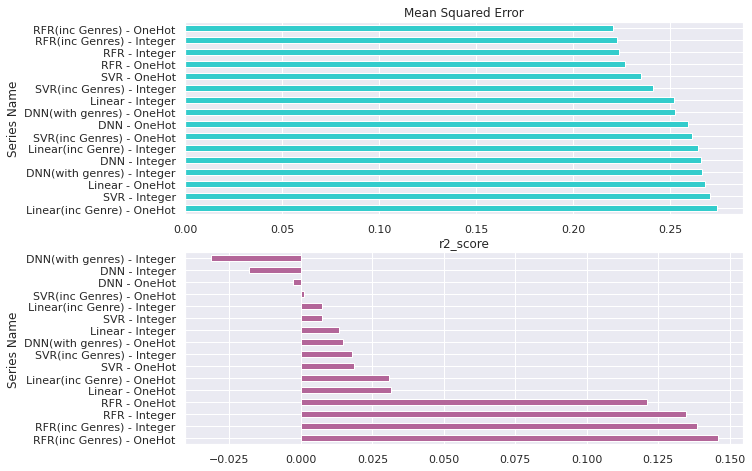

In [87]:
resultsdf.set_index('Series Name', inplace = True)

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.2, 0.8, 0.8, 1), title = 'Mean Squared Error')
#plt.subplot(3,1,2)
#resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,2)
resultsdf['r2_score'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'r2_score')
plt.show()